In [63]:
import requests

In [68]:
API_KEY = '468d80692deb4cf780a40f21fec49df7'
URL = 'https://newsapi.org/v2/everything'


params = {
    'q': 'stock market OR finance OR fintech',
    'language': 'en',
    'sortBy': 'publishedAt',
    'pageSize': 100,
    'apiKey': API_KEY
}

response = requests.get(URL, params=params)

if response.status_code == 200:
    data = response.json()
    for article in data['articles']:
        print(f"Title: {article['title']}\nDescription: {article['description']}\n")

else:
    print("Failed to fetch articles. Check your API key and query parameters.")

Title: Do Wall Street Analysts Like Avery Dennison Stock?
Description: Less than $10/month! Get more Watchlists, Portfolios, Custom Views and Chart Templates with Barchart Plus.
FREE 30 Day Trial
- Market Pulse
-
- Options Market Overview
- Unusual Options Activity
- IV Rank and IV Percentile
- Implied vs Realized Vol
- Most Act…

Title: Independent Advisor Alliance Purchases New Stake in Builders FirstSource, Inc. (NYSE:BLDR)
Description: Independent Advisor Alliance purchased a new position in Builders FirstSource, Inc. (NYSE:BLDR – Free Report) during the third quarter, HoldingsChannel.com reports. The fund purchased 1,337 shares of the company’s stock, valued at approximately $259,000. A nu…

Title: The Crucial T500 wins the battle of the Black Friday SSD deals, with better-than-half-price savings
Description: Black Friday is usually heaving with discounts on NVMe SSDs, and today’s is no exception. Rather than do the usual routine of just suggesting the WD Black SN850X again, howev

In [69]:
import pandas as pd

articles = []

for article in data['articles']:
    articles.append({
        'title': article['title'],
        'description': article['description'],
        'publishedAt': article['publishedAt'],
        'url': article['url']
    })

df = pd.DataFrame(articles)

df.to_csv('financial_news.csv', index=False)

print("Data saved to 'financail_news.csv'")

Data saved to 'financail_news.csv'


In [71]:
df = pd.read_csv("financial_news.csv")

print(df.head())

print('\nMissing Values:')
print(df.isnull)

df_cleaned = df.dropna(subset=['title', 'description'])

df_cleaned = df_cleaned.drop_duplicates(subset='title')

df_cleaned =  df_cleaned[df_cleaned['title'] != '[Removed]']

print('\nData Summary:')
print(df_cleaned.describe(include='all'))

df_cleaned.to_csv("financial_news_cleaned.csv", index='False')

                                               title  \
0  Do Wall Street Analysts Like Avery Dennison St...   
1  Independent Advisor Alliance Purchases New Sta...   
2  The Crucial T500 wins the battle of the Black ...   
3  Chinese gaming giant Boyaa Interactive dumps E...   
4  Share market update: Most active stocks of the...   

                                         description           publishedAt  \
0  Less than $10/month! Get more Watchlists, Port...  2024-11-29T11:27:35Z   
1  Independent Advisor Alliance purchased a new p...  2024-11-29T11:26:53Z   
2  Black Friday is usually heaving with discounts...  2024-11-29T11:26:28Z   
3  Chinese gaming giant Boyaa Interactive, listed...  2024-11-29T11:26:27Z   
4                         The NSE Nifty index closed  2024-11-29T11:25:56Z   

                                                 url  
0              https://biztoc.com/x/2bf36dcb13c82b16  
1  https://www.etfdailynews.com/2024/11/29/indepe...  
2  https://www.rockpapershotg

In [119]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

df_cleaned = pd.read_csv('financial_news_cleaned.csv')

df_cleaned['text'] = df_cleaned['title'] + ' ' + df_cleaned['description']

df_cleaned['text'] = df_cleaned['text'].str.lower()

def clean_text(text):
    return re.sub(r'[^a-z\s]', '', text)

df_cleaned['text'] = df_cleaned['text'].apply(clean_text)

def tokenize_text(text):
    return text.split()

df_cleaned['tokens'] = df_cleaned['text'].apply(tokenize_text)

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = []
    for word in tokens:
        if word not in stop_words:
            filtered_tokens.append(word)
    return filtered_tokens

df_cleaned['tokens'] = df_cleaned['tokens'].apply(remove_stopwords)

print(df_cleaned[['text', 'tokens']].head())

                                                text  \
0  do wall street analysts like avery dennison st...   
1  independent advisor alliance purchases new sta...   
2  chinese gaming giant boyaa interactive dumps e...   
3  share market update most active stocks of the ...   
4  insider selling ares management co nyseares ce...   

                                              tokens  
0  [wall, street, analysts, like, avery, dennison...  
1  [independent, advisor, alliance, purchases, ne...  
2  [chinese, gaming, giant, boyaa, interactive, d...  
3  [share, market, update, active, stocks, day, t...  
4  [insider, selling, ares, management, co, nysea...  


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/farazahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)

X = vectorizer.fit_transform(df_cleaned['text'])

df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(df_tfidf.head())

   abating  about   ac  accordance  according  accurately  acquired  acquires  \
0      0.0    0.0  0.0         0.0   0.000000         0.0       0.0       0.0   
1      0.0    0.0  0.0         0.0   0.000000         0.0       0.0       0.0   
2      0.0    0.0  0.0         0.0   0.063777         0.0       0.0       0.0   
3      0.0    0.0  0.0         0.0   0.000000         0.0       0.0       0.0   
4      0.0    0.0  0.0         0.0   0.000000         0.0       0.0       0.0   

   acquisition  across  ...  wrong  yearold  years  yen  yet  yields  york  \
0          0.0     0.0  ...    0.0      0.0    0.0  0.0  0.0     0.0   0.0   
1          0.0     0.0  ...    0.0      0.0    0.0  0.0  0.0     0.0   0.0   
2          0.0     0.0  ...    0.0      0.0    0.0  0.0  0.0     0.0   0.0   
3          0.0     0.0  ...    0.0      0.0    0.0  0.0  0.0     0.0   0.0   
4          0.0     0.0  ...    0.0      0.0    0.0  0.0  0.0     0.0   0.0   

   you  your  zacznikwdetailedreportonacquis

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y = df_cleaned['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9375
Confusion Matrix:
[[ 3  1]
 [ 0 12]]
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.75      0.86         4
           1       0.92      1.00      0.96        12

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.91        16
weighted avg       0.94      0.94      0.93        16



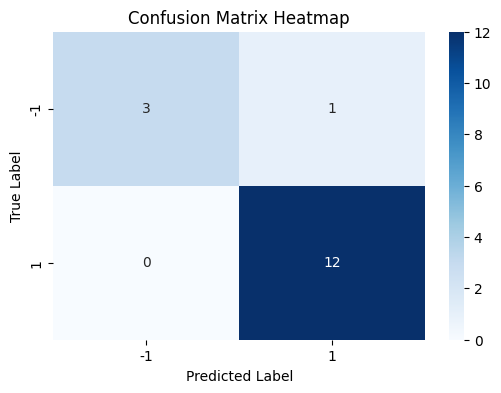

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[-1,1], yticklabels=[-1,1])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

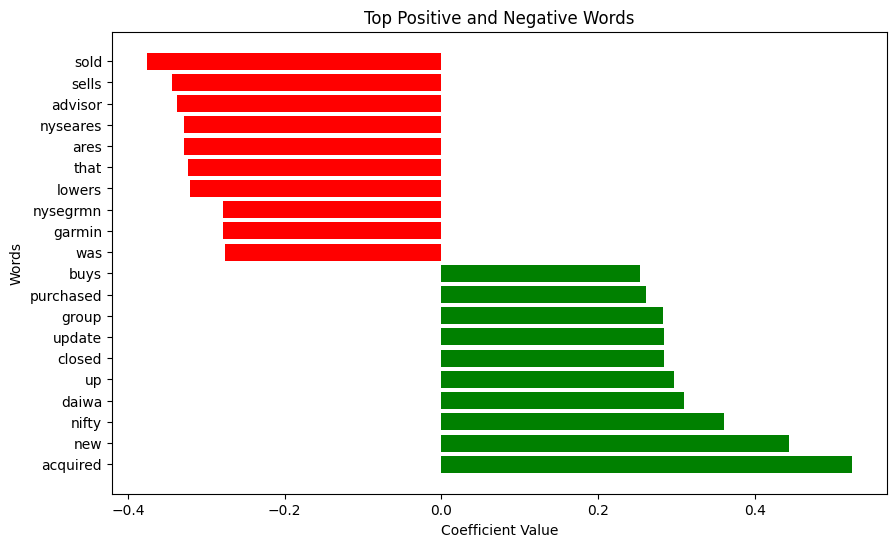

In [129]:
# Extracting feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]  # For binary classification

# Pairing feature names with their coefficients
feature_coeffs = list(zip(feature_names, coefficients))

# Sorting coefficients
feature_coeffs_sorted = sorted(feature_coeffs, key=lambda x: x[1], reverse=True)

# Top 10 positive and negative coefficients
top_positive = feature_coeffs_sorted[:10]
top_negative = feature_coeffs_sorted[-10:]

# Preparing data for visualization
words = [x[0] for x in top_positive + top_negative]
values = [x[1] for x in top_positive + top_negative]

# Bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, values, color=["green" if v > 0 else "red" for v in values])
plt.xlabel("Coefficient Value")
plt.ylabel("Words")
plt.title("Top Positive and Negative Words")
plt.show()
